In [1]:
#import the necessary library files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import io
%cd "C:\Users\Chandini Yakkati\Downloads\bigmartsales"

C:\Users\Chandini Yakkati\Downloads\bigmartsales


In [3]:
bigmarttrain=pd.read_csv('train_v9rqX0R.csv')
# Train - Train file will have complete data including Dependent Variable
# Train data is used to build a model

In [4]:
bigmarttest=pd.read_csv('test_AbJTz2l.csv')
# Test - Test file will not have Dependent Variable. Dependent Variable needs to be predicted using Train Model.

In [5]:
print(bigmarttrain.shape)
print(bigmarttest.shape)
# Shape is used to get the current shape of an array (number of rows and number of columns)

(8523, 12)
(5681, 11)


In [6]:
bigmarttrain.columns
# columns method return the column labels of the given Dataframe

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
bigmarttrain.describe()
# describe() method returns description of the data in the DataFrame

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
bigmarttrain.info()
# info() method prints information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
bigmarttrain.head() ## head() function gives first 5rows of data.

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Hypothesis Testing

In [10]:
# Hypothesis Testing - Comparision of Means or Averages of 2 or more than 2
# Groups/levels/Classes


In [11]:
# Test Null Average Item_Outlet_Sales of different Outlet_Size are equal?

In [12]:
bigmarttrain.Item_Outlet_Sales.groupby(bigmarttrain.Outlet_Size).mean()

Outlet_Size
High      2298.995256
Medium    2681.603542
Small     1912.149161
Name: Item_Outlet_Sales, dtype: float64

In [13]:
# Since there are more than 2 levels - Anova Single Factor/One Way Anova
# Null - There is no Significant difference in Average Item_Outlet_Sales of
# different Outlet_Size stores.
# Alt - There is Significant difference in Average Item_Outlet_Sales of different Outlet_Size stores.


In [14]:
from scipy.stats import f_oneway

In [15]:
high=bigmarttrain[bigmarttrain.Outlet_Size=="High"]
medium=bigmarttrain[bigmarttrain.Outlet_Size=="Medium"]
small=bigmarttrain[bigmarttrain.Outlet_Size=="Small"]

In [16]:
f_oneway(high.Item_Outlet_Sales,medium.Item_Outlet_Sales,small.Item_Outlet_Sales) ## since pvalue is less than 0.05 reject null 
#hypothesis

F_onewayResult(statistic=131.09669439861293, pvalue=1.7912745521017898e-56)

In [17]:
#Test Null Average Item_Visibility for different Outlet_Location_Type are equal?

In [18]:
bigmarttrain.Item_Visibility.groupby(bigmarttrain.Outlet_Location_Type).mean()

Outlet_Location_Type
Tier 1    0.071205
Tier 2    0.061038
Tier 3    0.066751
Name: Item_Visibility, dtype: float64

In [19]:
# Since there are more than 2 levels - Anova Single Factor/One Way Anova
# Null - There is no Significant difference in Average Item_Visibility for different Outlet_Location_Type.
# Alt - There is Significant difference in Average Item_Visibility for different Outlet_Location_Type.


In [20]:
from scipy.stats import f_oneway

In [21]:
T1=bigmarttrain[bigmarttrain.Outlet_Location_Type=="Tier 1"]
T2=bigmarttrain[bigmarttrain.Outlet_Location_Type=="Tier 2"]
T3=bigmarttrain[bigmarttrain.Outlet_Location_Type=="Tier 3"]

In [22]:
f_oneway(T1.Item_Visibility,T2.Item_Visibility,T3.Item_Visibility) # since pvalue less than 0.05 reject null hypothesis

F_onewayResult(statistic=25.502631485439718, pvalue=9.06501507948925e-12)

In [23]:
#Both Variables are Non Numeric & categorical - chiSquare Test of Independence

In [24]:
#Test Null No Association between Outlet_Size & Outlet_Type?

In [25]:
# Null - There is no association between both variables
# Alt - There is association between both variables


In [26]:
pd.crosstab(bigmarttrain.Outlet_Size,bigmarttrain.Outlet_Type)

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,932,0,0
Medium,0,930,928,935
Small,528,1860,0,0


In [27]:
from scipy.stats import chi2_contingency

In [28]:
chi2_contingency(pd.crosstab(bigmarttrain.Outlet_Type,bigmarttrain.Outlet_Size)) ## since pvalue <0.05 reject null

(3734.861462225357,
 0.0,
 6,
 array([[  80.49991821,  241.24063471,  206.25944708],
        [ 567.46343857, 1700.56371667, 1453.97284476],
        [ 141.48470473,  423.99869131,  362.51660396],
        [ 142.55193849,  427.1969573 ,  365.2511042 ]]))

In [29]:
# Test Null No Association between Outlet_Size and Outlet_Location_Type?

In [30]:
# Null - There is no association between both variables
# Alt - There is association between both variables


In [31]:
pd.crosstab(bigmarttrain.Outlet_Size,bigmarttrain.Outlet_Location_Type)

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,0,1863
Small,1458,930,0


In [32]:
from scipy.stats import chi2_contingency

In [33]:
chi2_contingency(pd.crosstab(bigmarttrain.Outlet_Size,bigmarttrain.Outlet_Location_Type)) # since pvalue <0.05 reject null

(4095.431263490629,
 0.0,
 4,
 array([[ 364.07917553,  141.78962866,  426.13119581],
        [1091.06559791,  424.9124816 , 1277.0219205 ],
        [ 932.85522657,  363.29788974, 1091.84688369]]))

# Data preprocessing

In [34]:
# Check Missing Values 
bigmarttrain.isnull().sum().sort_values(ascending=False)
# .isnull().sum() returns the number of missing values in the data set.
# sort_values will sort the data in descending order (i.e., from highest to lowest)

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [35]:
bigmarttest.isnull().sum().sort_values(ascending=False)
# .isnull().sum() returns the number of missing values in the data set.
# sort_values will sort the data in descending order (i.e., from highest to lowest)

Outlet_Size                  1606
Item_Weight                   976
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [36]:
# Since similar columns have missing values Combine both dataframes
# For Concating dataframes, Number of Columns must be equal
# Create Dependent Variable Column in Test data
bigmarttest['Item_Outlet_Sales']='test'

In [37]:
# Concatenation of 2 dataframes - Row wise
combinedf=pd.concat([bigmarttrain,bigmarttest],axis=0)
# axis=0 is Row Concatenation
# axis=1 is Column Concatenation

In [38]:
combinedf.shape

(14204, 12)

In [39]:
combinedf.Outlet_Size.value_counts(dropna=False)
# value_counts() method returns a Series containing the counts of unique values.

Medium    4655
NaN       4016
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [40]:
combinedf.Outlet_Size=combinedf.Outlet_Size.fillna('Unknown')
# NaN values are replaced as Unknown
## more than 70% of the column cell data is miising,  we have to impute with word "missing" or "notavailable" or "unknown". 

In [41]:
combinedf.Outlet_Size.value_counts()

Medium     4655
Unknown    4016
Small      3980
High       1553
Name: Outlet_Size, dtype: int64

In [42]:
combinedf.Item_Weight.describe()
# The describe() function computes a summary of statistics pertaining to the DataFrame columns
# describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.

count    11765.000000
mean        12.792854
std          4.652502
min          4.555000
25%          8.710000
50%         12.600000
75%         16.750000
max         21.350000
Name: Item_Weight, dtype: float64

In [43]:
combinedf.Item_Weight=combinedf.Item_Weight.fillna(combinedf.Item_Weight.mean())
# less than 70% of the column cell data is missing, Numeric Variable - impute with Mean or Median.

In [44]:
combinedf.Item_Weight.describe()

count    14204.000000
mean        12.792854
std          4.234226
min          4.555000
25%          9.300000
50%         12.792854
75%         16.000000
max         21.350000
Name: Item_Weight, dtype: float64

In [45]:
combinedf.columns ## gives names of the columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [46]:
combinedf.Item_Identifier.head()

0    FDA15
1    DRC01
2    FDN15
3    FDX07
4    NCD19
Name: Item_Identifier, dtype: object

In [47]:
combinedf['Item_Code']=combinedf.Item_Identifier.apply(lambda x:x[0:2])
# lamda are anonymous fuction and arguments directly
# def function name
#        arguments

In [48]:
combinedf.Item_Code.value_counts()
# FD - Food      NC - Non Consumables    DR - Drinks

FD    10201
NC     2686
DR     1317
Name: Item_Code, dtype: int64

In [49]:
combinedf.Item_Fat_Content.value_counts() #Checking for duplicate levels or classes in categorical variables.

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [50]:
combinedf.Item_Fat_Content=combinedf.Item_Fat_Content.replace(
['LF','low fat'], 'Low Fat') # replacing duplicate levels

In [51]:
combinedf.Item_Fat_Content=combinedf.Item_Fat_Content.replace('reg',
                                                              'Regular')

In [52]:
combinedf.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [53]:
combinedf.Item_Visibility.describe() ##When Minimum is Zero, Always check how many cells in the column are
# zeroes then Impute with Mean or Median

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

In [54]:
zerorows=combinedf[combinedf.Item_Visibility==0]
print(zerorows.shape)

(879, 13)


In [55]:
combinedf.Item_Visibility=combinedf.Item_Visibility.replace(
    0,combinedf.Item_Visibility.median()) ### zero rows are imputed with median.

In [56]:
combinedf.Item_Type.value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [57]:
combinedf.Item_MRP.describe()

count    14204.000000
mean       141.004977
std         62.086938
min         31.290000
25%         94.012000
50%        142.247000
75%        185.855600
max        266.888400
Name: Item_MRP, dtype: float64

In [58]:
combinedf.Outlet_Identifier.value_counts()

OUT027    1559
OUT013    1553
OUT046    1550
OUT049    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [59]:
# Create a new Column called Outlet_Age from Outlet_Establishment_Year
# Age of the Outlet as of year 2020
combinedf['Outlet_Age']=2020-combinedf.Outlet_Establishment_Year

In [60]:
combinedf.Outlet_Age.describe()

count    14204.000000
mean        22.169319
std          8.371664
min         11.000000
25%         16.000000
50%         21.000000
75%         33.000000
max         35.000000
Name: Outlet_Age, dtype: float64

In [61]:
combinedf.Outlet_Location_Type.value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

In [62]:
combinedf.Outlet_Type.value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [63]:
combinedf.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Code', 'Outlet_Age'],
      dtype='object')

In [64]:
#Split dataframe into Numeric Columns & Object Columns
numericcols=combinedf[['Item_Weight','Item_Visibility','Item_MRP',
                      'Item_Outlet_Sales','Outlet_Age']]

In [65]:
objectcols=combinedf[['Item_Fat_Content','Item_Type','Outlet_Identifier',
                     'Outlet_Size', 'Outlet_Location_Type','Outlet_Type',
                     'Item_Code']]

In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
le=LabelEncoder() # Label Encoder assigns numeric identifiers to text data or categorical levels 
#starting from 0 to n levels in Alphabetical Order.


In [68]:
objectcolslabelEncode=objectcols.apply(le.fit_transform)

In [69]:
objectcols.head(3)

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Code
0,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,FD
1,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,DR
2,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,FD


In [70]:
objectcolslabelEncode.head(3)

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Code
0,0,4,9,1,0,1,1
1,1,14,3,1,2,2,0
2,0,10,9,1,0,1,1


In [71]:
print(objectcols.shape)
print(objectcolslabelEncode.shape)

(14204, 7)
(14204, 7)


In [72]:
objectcolsdummy=pd.get_dummies(objectcols) ##pd.get_dummies() - Create new Columns in Data
# & use Binary Encoding (0-No & 1-yes)

In [73]:
objectcolsdummy.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Code_DR,Item_Code_FD,Item_Code_NC
0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [74]:
combinedfclean=pd.concat([numericcols,objectcolsdummy],axis=1)
# axis=1 is Columns wise Concatenation 

In [75]:
# Split Data Back to Train & test
bigmarttraindf=combinedfclean[combinedfclean.Item_Outlet_Sales!='test']
bigmarttestdf=combinedfclean[combinedfclean.Item_Outlet_Sales=='test']

In [76]:
# Drop Item_Outlet_Sales from bigmarttestdf
bigmarttestdf=bigmarttestdf.drop('Item_Outlet_Sales',axis=1)

In [77]:
print(bigmarttraindf.shape)
print(bigmarttestdf.shape)

(8523, 47)
(5681, 46)


In [78]:
# Split Train Data into Dependent Variable(y) and Independent Variables(X)
y=bigmarttraindf.Item_Outlet_Sales
X=bigmarttraindf.drop('Item_Outlet_Sales',axis=1)

In [79]:
y.head()

0    3735.138
1    443.4228
2     2097.27
3      732.38
4    994.7052
Name: Item_Outlet_Sales, dtype: object

In [80]:
y=pd.to_numeric(y)

1.1775306028542796


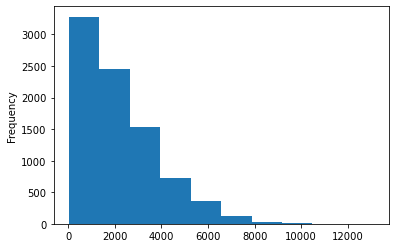

In [81]:
# Basic Assumption of Depedent Variable
# Check using histogram, boxplot & density Curve
y.plot(kind='hist')
print(y.skew())

<AxesSubplot:>

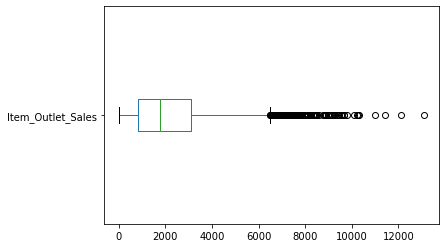

In [82]:
y.plot(kind='box',vert=False) ## Boxplot identifies outliers using formula
# Minimum - Q1 - 1.5 * IQR
# Maximum - Q3 + 1.5 * IQR

<AxesSubplot:ylabel='Density'>

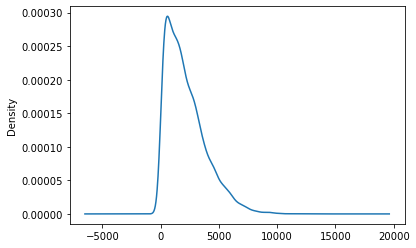

In [83]:
y.plot(kind='density')

# Model Building

# LinearRegression

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
reg=LinearRegression()

In [86]:
regmodel=reg.fit(X,y)

In [87]:
regmodel.score(X,y) # R Square is 0.56 

0.563745756733816

In [88]:
regmodel.intercept_

-564.5369868393805

In [89]:
print(list(zip(X.columns,regmodel.coef_)))

[('Item_Weight', -0.5242333788152896), ('Item_Visibility', -251.62868598320668), ('Item_MRP', 15.570399334380252), ('Outlet_Age', 14.35792395040023), ('Item_Fat_Content_Low Fat', -21.02524815865419), ('Item_Fat_Content_Regular', 21.02524815865258), ('Item_Type_Baking Goods', -2.8240454244814743), ('Item_Type_Breads', 2.4245700761575217), ('Item_Type_Breakfast', 3.105641583076262), ('Item_Type_Canned', 22.416513066432326), ('Item_Type_Dairy', -53.317598357430356), ('Item_Type_Frozen Foods', -30.850921638505834), ('Item_Type_Fruits and Vegetables', 26.9364445806195), ('Item_Type_Hard Drinks', -48.404853379457776), ('Item_Type_Health and Hygiene', 4.596608021810993), ('Item_Type_Household', -24.554056283620397), ('Item_Type_Meat', -3.378598661887533), ('Item_Type_Others', -6.586071837584244), ('Item_Type_Seafood', 181.73963717054374), ('Item_Type_Snack Foods', -14.300353486003738), ('Item_Type_Soft Drinks', -75.99468657947443), ('Item_Type_Starchy Foods', 18.991771149794104), ('Outlet_Ide

In [90]:
regpredict=regmodel.predict(X)

In [91]:
regresidual=y-regpredict

In [92]:
np.sqrt(np.mean(regresidual**2)) # RMSE -1127.0691

1127.0691114311414

In [93]:
# Submit to Competition Site 
testpredict=regmodel.predict(bigmarttestdf)

In [94]:
testpredict

array([1832.63309797, 1521.99278353, 1883.07654544, ..., 1826.50698315,
       3572.27662662, 1289.06940991])

In [95]:
#pd.DataFrame(testpredict).to_csv("reg.csv")

# DecisionTree

In [102]:
from sklearn.tree import DecisionTreeRegressor

In [103]:
tree= DecisionTreeRegressor()

In [104]:
treemodel=tree.fit(X,y)

In [105]:
treemodel.score(X,y)

1.0

In [106]:
treepredict=treemodel.predict(bigmarttestdf)

In [107]:
pd.DataFrame(treepredict).to_csv("tree.csv")

In [108]:
tree2=DecisionTreeRegressor(max_depth=20)

In [109]:
tree2model=tree2.fit(X,y)

In [110]:
tree2model.score(X,y)

0.9327951162321187

In [111]:
tree2predict=tree2model.predict(bigmarttestdf)

In [112]:
pd.DataFrame(tree2predict).to_csv("tree2.csv")

In [113]:
from sklearn.tree import DecisionTreeRegressor

In [114]:
from sklearn.tree import plot_tree

In [115]:
import matplotlib.pyplot as plt

[Text(334.8, 570.7800000000001, 'Item_MRP <= 143.53\nmse = 2911799.258\nsamples = 8523\nvalue = 2181.289'),
 Text(167.4, 407.70000000000005, 'Outlet_Type_Grocery Store <= 0.5\nmse = 964255.849\nsamples = 4296\nvalue = 1357.917'),
 Text(83.7, 244.62, 'Item_MRP <= 76.433\nmse = 882485.461\nsamples = 3757\nvalue = 1523.016'),
 Text(41.85, 81.53999999999996, '\n  (...)  \n'),
 Text(125.55000000000001, 81.53999999999996, '\n  (...)  \n'),
 Text(251.10000000000002, 244.62, 'Item_MRP <= 82.011\nmse = 19917.889\nsamples = 539\nvalue = 207.131'),
 Text(209.25, 81.53999999999996, '\n  (...)  \n'),
 Text(292.95, 81.53999999999996, '\n  (...)  \n'),
 Text(502.20000000000005, 407.70000000000005, 'Outlet_Type_Grocery Store <= 0.5\nmse = 3501872.303\nsamples = 4227\nvalue = 3018.101'),
 Text(418.5, 244.62, 'Outlet_Identifier_OUT027 <= 0.5\nmse = 2907623.078\nsamples = 3683\nvalue = 3394.277'),
 Text(376.65000000000003, 81.53999999999996, '\n  (...)  \n'),
 Text(460.35, 81.53999999999996, '\n  (...)  

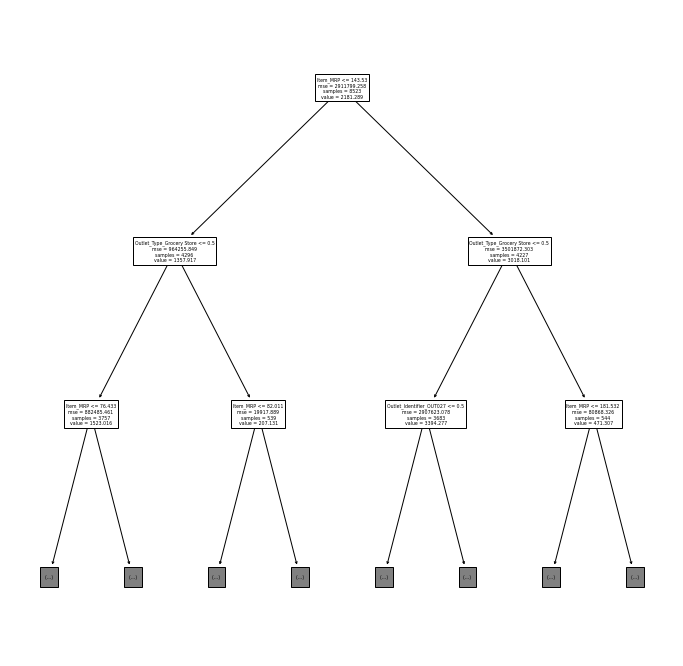

In [116]:
plt.figure(figsize=(12,12))
plot_tree(treemodel,feature_names=X.columns,max_depth=2)

In [117]:
print(list(zip(X.columns,treemodel.feature_importances_)))

[('Item_Weight', 0.0421591922790698), ('Item_Visibility', 0.11049332048749261), ('Item_MRP', 0.4413019896503392), ('Outlet_Age', 0.025344308279324032), ('Item_Fat_Content_Low Fat', 0.006191615456721576), ('Item_Fat_Content_Regular', 0.005130162898509451), ('Item_Type_Baking Goods', 0.004998019118598728), ('Item_Type_Breads', 0.004021414239904297), ('Item_Type_Breakfast', 0.001427216215461865), ('Item_Type_Canned', 0.004561240265195968), ('Item_Type_Dairy', 0.006661476349188509), ('Item_Type_Frozen Foods', 0.00605154263389415), ('Item_Type_Fruits and Vegetables', 0.007204437454099193), ('Item_Type_Hard Drinks', 0.002046627149581888), ('Item_Type_Health and Hygiene', 0.0023660614408751897), ('Item_Type_Household', 0.0030915077486001535), ('Item_Type_Meat', 0.0018648898676449637), ('Item_Type_Others', 0.0012477819563450853), ('Item_Type_Seafood', 0.001378810962128595), ('Item_Type_Snack Foods', 0.007879270090911697), ('Item_Type_Soft Drinks', 0.0023064402879732744), ('Item_Type_Starchy Fo

In [118]:
type(treemodel.feature_importances_)

numpy.ndarray

In [119]:
pd.DataFrame(treemodel.feature_importances_,index=X.columns).sort_values(by=0,ascending=False)

,0
Item_MRP,0.441302
Outlet_Type_Grocery Store,0.196067
Item_Visibility,0.110493
Outlet_Identifier_OUT027,0.058926
Item_Weight,0.042159
Outlet_Age,0.025344
Item_Type_Snack Foods,0.007879
Item_Type_Fruits and Vegetables,0.007204
Item_Type_Dairy,0.006661
Item_Fat_Content_Low Fat,0.006192


# RandomForest

In [96]:
from sklearn.ensemble import RandomForestRegressor

In [97]:
RF=RandomForestRegressor(n_estimators=3000,max_depth=10)

In [98]:
RFmodel=RF.fit(X,y)

In [121]:
RFmodel.score(X,y)

0.7048805034487556